In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
save_flag = False
save_path = ""

In [17]:
algorithms = ["BSD", "IDSD", "SDMapStar"]
datasets = ["AB", "MIMIC", "Mushrooms"]

global_results = pd.DataFrame(columns=["Algorithm", "Dataset", "Metric", "Value", "Description"])

for algorithm in algorithms:
    for dataset in datasets:
        results = pd.read_csv(f"results/results_{algorithm}_{dataset}_cross_validation.csv")
        results["Algorithm"] = algorithm
        results["Dataset"] = dataset
        results["Subgroup"] = list(range(1, len(results) + 1))
        results["Train coverage"] = (results["tp train"] + results["fp train"]) / (results["TP train"] + results["FP train"])
        results["Test coverage"] = (results["tp test"] + results["fp test"]) / (results["TP test"] + results["FP test"])
        results["Train confidence"] = results["tp train"] / (results["tp train"] + results["fp train"])
        results["Test confidence"] = results["tp test"] / (results["tp test"] + results["fp test"])
        results["Coverage diff"] = results["Test coverage"] - results["Train coverage"]
        results["Confidence diff"] = results["Test confidence"] - results["Train confidence"]
        global_results = pd.concat([global_results, pd.DataFrame({"Algorithm": algorithm, "Dataset": dataset, "Metric": "Train coverage", "Value": results["Train coverage"], "Description": results["Description"]})])
        global_results = pd.concat([global_results, pd.DataFrame({"Algorithm": algorithm, "Dataset": dataset, "Metric": "Test coverage", "Value": results["Test coverage"], "Description": results["Description"]})])
        global_results = pd.concat([global_results, pd.DataFrame({"Algorithm": algorithm, "Dataset": dataset, "Metric": "Train confidence", "Value": results["Train confidence"], "Description": results["Description"]})])
        global_results = pd.concat([global_results, pd.DataFrame({"Algorithm": algorithm, "Dataset": dataset, "Metric": "Test confidence", "Value": results["Test confidence"], "Description": results["Description"]})])
        global_results = pd.concat([global_results, pd.DataFrame({"Algorithm": algorithm, "Dataset": dataset, "Metric": "Coverage diff", "Value": results["Coverage diff"], "Description": results["Description"]})])
        global_results = pd.concat([global_results, pd.DataFrame({"Algorithm": algorithm, "Dataset": dataset, "Metric": "Confidence diff", "Value": results["Confidence diff"], "Description": results["Description"]})])

/var/folders/8t/9k67z5kn5ng1kb2fsdyc_v0r0000gn/T/ipykernel_28049/2643062413.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  global_results = pd.concat([global_results, pd.DataFrame({"Algorithm": algorithm, "Dataset": dataset, "Metric": "Train coverage", "Value": results["Train coverage"], "Description": results["Description"]})])


In [18]:
new_algorithms = ["BSD", "IDSD", "SDMap*"]
new_datasets = ["Vancomycin", "Staph Au Coag+", "Mushrooms"]
for i,a in enumerate(new_algorithms):
    old_algorithm = algorithms[i]
    global_results["Algorithm"] = global_results["Algorithm"].replace(old_algorithm, a)
for i,d in enumerate(new_datasets):
    old_dataset = datasets[i]
    global_results["Dataset"] = global_results["Dataset"].replace(old_dataset, d)
algorithms = new_algorithms
datasets = new_datasets
    

<Axes: xlabel='Dataset', ylabel='Unique descriptions'>

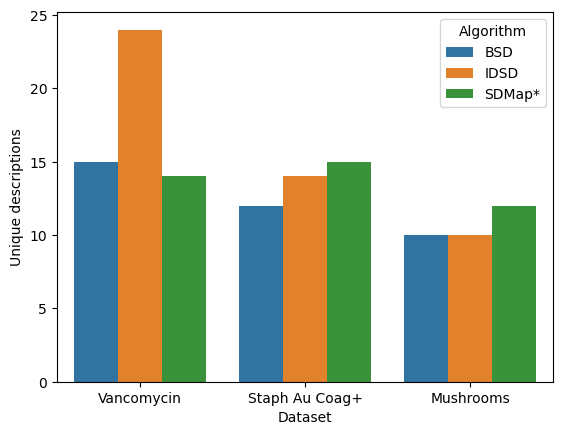

In [19]:
nunique_descriptions = pd.DataFrame(columns=["Algorithm", "Dataset", "Unique descriptions"])

for algorithm in algorithms:
    for dataset in datasets:
        results = global_results[(global_results["Algorithm"] == algorithm) & (global_results["Dataset"] == dataset)]
        nunique_descriptions.loc[len(nunique_descriptions)] = [algorithm, dataset, results["Description"].nunique()]

sns.barplot(x="Dataset", y="Unique descriptions", hue="Algorithm", data=nunique_descriptions)

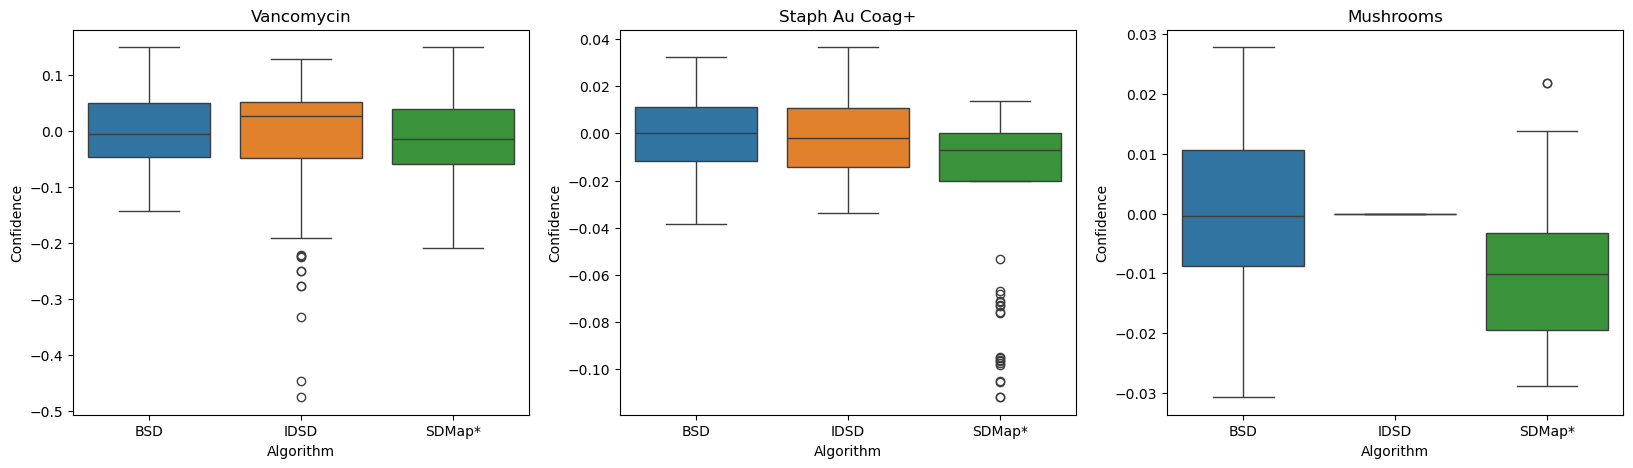

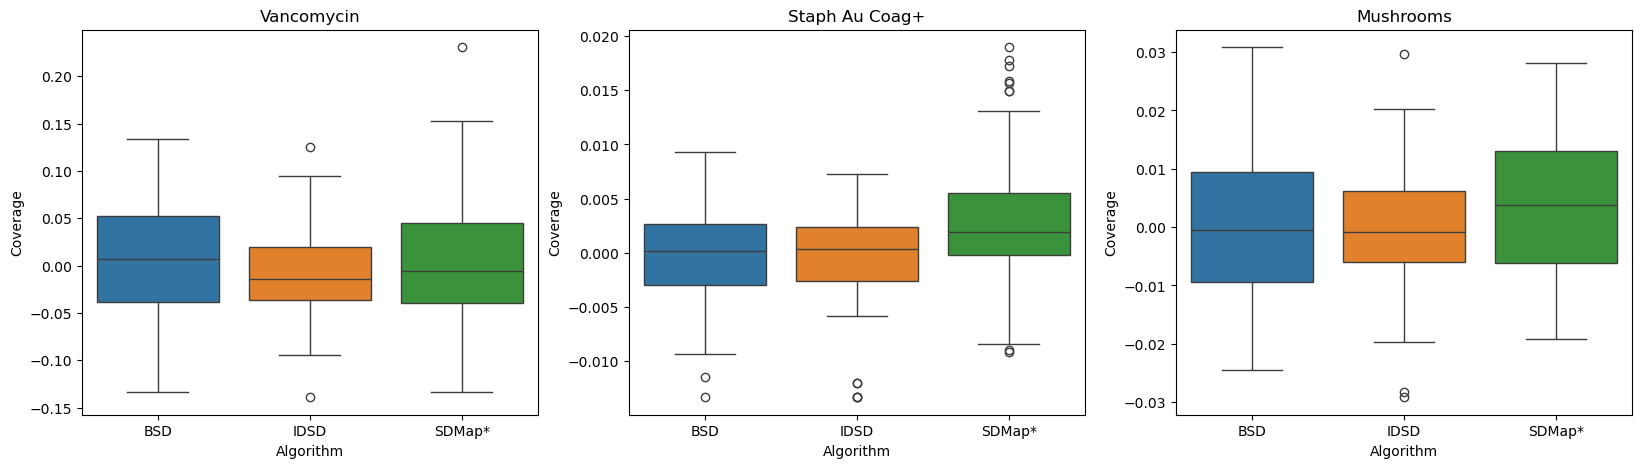

In [20]:
fig_conf, ax_conf = plt.subplots(1,3, figsize=(20, 5))
fig_cov, ax_cov = plt.subplots(1,3, figsize=(20, 5))

for i, dataset in enumerate(datasets):
    conf = global_results[(global_results["Dataset"] == dataset) & (global_results["Metric"] == "Confidence diff")]
    sns.boxplot(x="Algorithm", y="Value", hue="Algorithm", data=conf, ax=ax_conf[i])
    ax_conf[i].set_title(dataset)
    ax_conf[i].set_ylabel("Confidence")
    cov = global_results[(global_results["Dataset"] == dataset) & (global_results["Metric"] == "Coverage diff")]
    sns.boxplot(x="Algorithm", y="Value", hue="Algorithm", data=cov, ax=ax_cov[i])
    ax_cov[i].set_title(dataset)
    ax_cov[i].set_ylabel("Coverage")

if save_flag:
    fig_conf.savefig(f"{save_path}/cv_confidence_diff.png")
    fig_cov.savefig(f"{save_path}/cv_coverage_diff.png")


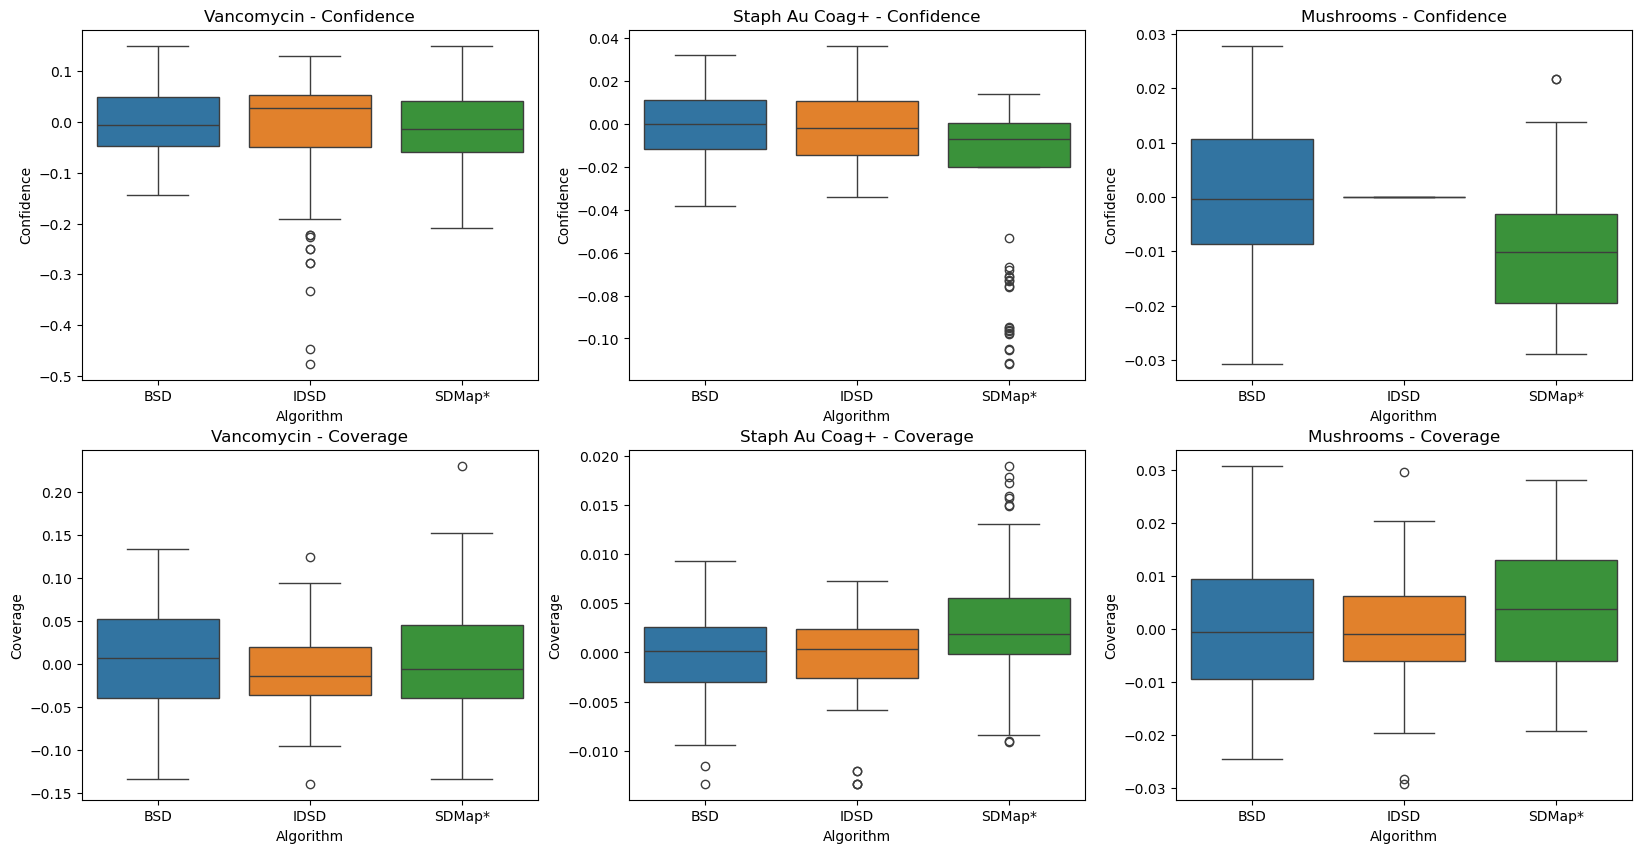

In [21]:
fig, (ax_conf, ax_cov) = plt.subplots(2, 3, figsize=(20, 10))

for i, dataset in enumerate(datasets):
    conf = global_results[(global_results["Dataset"] == dataset) & (global_results["Metric"] == "Confidence diff")]
    sns.boxplot(x="Algorithm", y="Value", hue="Algorithm", data=conf, ax=ax_conf[i])
    ax_conf[i].set_title(f"{dataset} - Confidence")
    ax_conf[i].set_ylabel("Confidence")
    
    cov = global_results[(global_results["Dataset"] == dataset) & (global_results["Metric"] == "Coverage diff")]
    sns.boxplot(x="Algorithm", y="Value", hue="Algorithm", data=cov, ax=ax_cov[i])
    ax_cov[i].set_title(f"{dataset} - Coverage")
    ax_cov[i].set_ylabel("Coverage")


if save_flag:
    fig.savefig(f"{save_path}/cv_combined_diff.png")